In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from IPython.display import display_markdown
from scipy.stats import linregress
import random
import numpy as np
import seaborn as sb

In [2]:
# Data Source
# https://www.kaggle.com/utkarshxy/who-worldhealth-statistics-2020-complete

In [3]:
#Bank Churners
bank_churners = pd.read_csv("BankChurners.csv")
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
# Drop unneccesary columns
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"]

In [5]:
#Dropping of Unneccesary column
del bank_churners["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]
bank_churners.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
# Checking for incomplete rows
bank_churners.count()

CLIENTNUM                   10127
Attrition_Flag              10127
Customer_Age                10127
Gender                      10127
Dependent_count             10127
Education_Level             10127
Marital_Status              10127
Income_Category             10127
Card_Category               10127
Months_on_book              10127
Total_Relationship_Count    10127
Months_Inactive_12_mon      10127
Contacts_Count_12_mon       10127
Credit_Limit                10127
Total_Revolving_Bal         10127
Avg_Open_To_Buy             10127
Total_Amt_Chng_Q4_Q1        10127
Total_Trans_Amt             10127
Total_Trans_Ct              10127
Total_Ct_Chng_Q4_Q1         10127
Avg_Utilization_Ratio       10127
dtype: int64

In [7]:
# Statistical Summary of Entire Cleaned Dataset
bank_churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [8]:
# Making a new data frame of only churners
churners = bank_churners.loc[bank_churners["Attrition_Flag"]=="Attrited Customer"]
churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
#Statistical Summary of Churners DataFrame
churners.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [10]:
# Summary Statistics for Existing Customers
content_customers = bank_churners.loc[bank_churners["Attrition_Flag"]=="Existing Customer"]
content_customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


In [11]:
content_customers.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


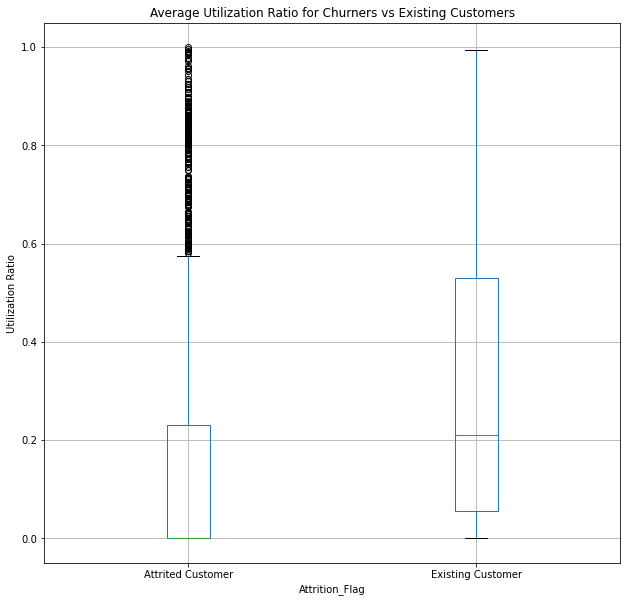

In [21]:
# Bar Graph to show Average Utilization Ratio for Churners vs. Non Churners
bank_churners.boxplot(by="Attrition_Flag", column = "Avg_Utilization_Ratio", figsize=(10,10))
plt.title("Average Utilization Ratio for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Utilization Ratio")
plt.show()


In [49]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_aur = churners["Avg_Utilization_Ratio"].mean()
content_aur = content_customers["Avg_Utilization_Ratio"].mean()

utilization_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Average Utilization Ratio":[content_aur, churner_aur]})

utilization_df["Average Utilization Ratio"] = utilization_df ["Average Utilization Ratio"].map("{:.2f}".format)

utilization_df

,Customer Type,Average Utilization Ratio
0,Existing Customer,0.30
1,Attrited Customer,0.16


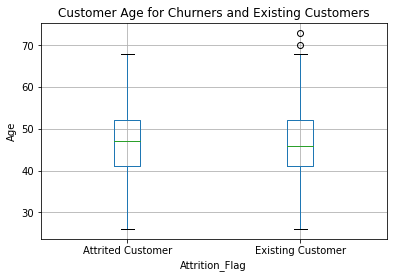

In [20]:
#Box Plot of Churners by Age
#times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
#fig1, ax1 = plt.subplots()
#ax1.set_title('Reaction Times at Baseball Batting Cage')
#ax1.set_ylabel('Reaction Time (ms)')
#ax1.boxplot(times)
#plt.show()

bank_churners.boxplot(by="Attrition_Flag", column = "Customer_Age")
plt.title("Customer Age for Churners and Existing Customers")
plt.suptitle("")
plt.ylabel("Age")
plt.show()



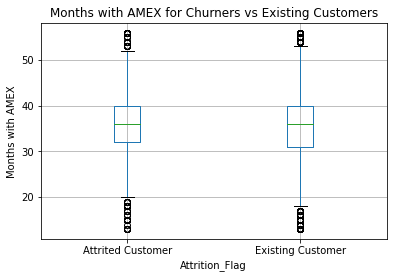

In [16]:
#Looking at Churners by How Long they had their cards 
bank_churners.boxplot(by="Attrition_Flag", column = "Months_on_book")
plt.title("Months with AMEX for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Months with AMEX")
plt.show()


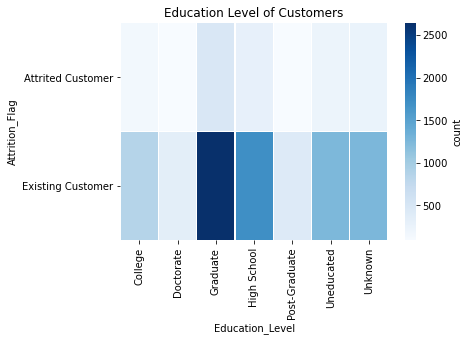

In [17]:
# Heatmap Comparing Customers based on Education Level 
education_groups = bank_churners[["Education_Level", "Attrition_Flag"]].groupby(by = ["Education_Level", "Attrition_Flag"]).size().unstack(level=0)
sb.heatmap(education_groups, cmap="Blues", cbar_kws={"label":"count"}, linewidth=0.3)
plt.yticks(rotation=0)
plt.title("Education Level of Customers")
plt.show()

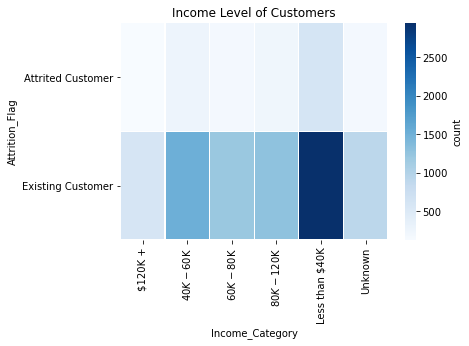

In [18]:
income_groups = bank_churners[["Income_Category", "Attrition_Flag"]].groupby(by = ["Income_Category", "Attrition_Flag"]).size().unstack(level=0)
sb.heatmap(income_groups, cmap="Blues", cbar_kws={"label":"count"}, linewidth=0.3)
plt.yticks(rotation=0)
plt.title("Income Level of Customers")
plt.show()

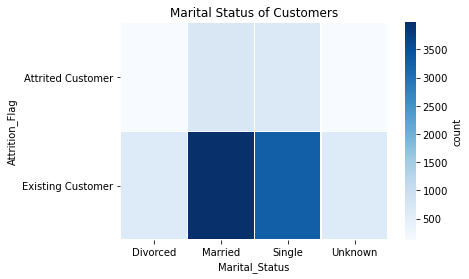

In [19]:
# Looking at Customers by Marital Status
marriage_groups = bank_churners[["Marital_Status", "Attrition_Flag"]].groupby(by = ["Marital_Status", "Attrition_Flag"]).size().unstack(level=0)
sb.heatmap(marriage_groups, cmap="Blues", cbar_kws={"label":"count"}, linewidth=0.3)
plt.yticks(rotation=0)
plt.title("Marital Status of Customers")
plt.show()

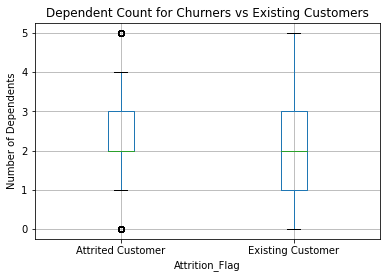

In [34]:
bank_churners.boxplot(by="Attrition_Flag", column = "Dependent_count")
plt.title("Dependent Count for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Number of Dependents")
plt.show()


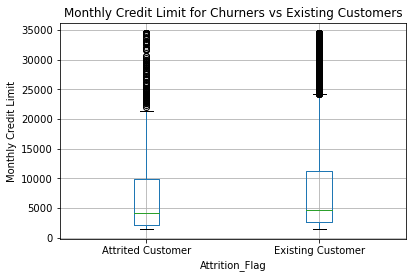

In [26]:
#Looking at Credit Limit for Churners via Existing Customers
bank_churners.boxplot(by="Attrition_Flag", column = "Credit_Limit")
plt.title("Monthly Credit Limit for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Monthly Credit Limit")
plt.show()


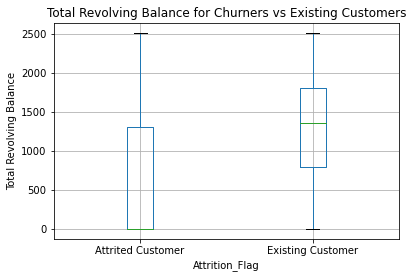

In [27]:
#Looking at Total Revolving Balance for Churners via Existing Customers
bank_churners.boxplot(by="Attrition_Flag", column = "Total_Revolving_Bal")
plt.title("Total Revolving Balance for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Revolving Balance")
plt.show()



In [56]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_trb = churners["Total_Revolving_Bal"].mean()
content_trb = content_customers["Total_Revolving_Bal"].mean()

balance_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Average Total Revolving Balance":[content_trb, churner_trb]})

balance_df["Average Total Revolving Balance"] = balance_df ["Average Total Revolving Balance"].map("{:.2f}".format)

balance_df

,Customer Type,Average Total Revolving Balance
0,Existing Customer,1256.60
1,Attrited Customer,672.82


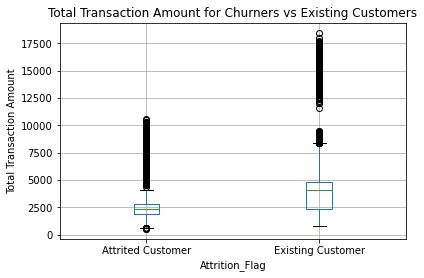

In [30]:
#Looking at Customers by Total Transaction Amount
bank_churners.boxplot(by="Attrition_Flag", column = "Total_Trans_Amt")
plt.title("Total Transaction Amount for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Transaction Amount")
plt.show()


In [57]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_tta = churners["Total_Trans_Amt"].mean()
content_tta = content_customers["Total_Trans_Amt"].mean()

amount_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Average Total Transaction Amount":[content_tta, churner_tta]})

amount_df["Average Total Transaction Amount"] = amount_df ["Average Total Transaction Amount"].map("{:.2f}".format)

amount_df

,Customer Type,Average Total Transaction Amount
0,Existing Customer,4654.66
1,Attrited Customer,3095.03


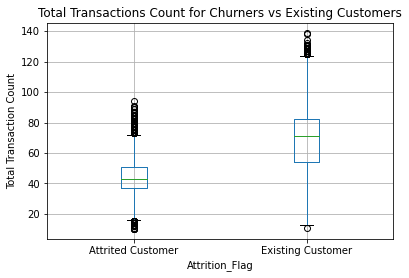

In [32]:
#Looking at Customers by Total Transaction Count
bank_churners.boxplot(by="Attrition_Flag", column = "Total_Trans_Ct")
plt.title("Total Transactions Count for Churners vs Existing Customers")
plt.suptitle("")
plt.ylabel("Total Transaction Count")
plt.show()


In [59]:
customer_types = bank_churners["Attrition_Flag"].unique()
churner_ttc = churners["Total_Trans_Ct"].mean()
content_ttc = content_customers["Total_Trans_Ct"].mean()

trans_count_df = pd.DataFrame({"Customer Type":[customer_types[0], customer_types[1]],
                              "Average Total Transaction Count":[content_ttc, churner_ttc]})

trans_count_df["Average Total Transaction Count"] = trans_count_df ["Average Total Transaction Count"].map("{:.2f}".format)

trans_count_df

,Customer Type,Average Total Transaction Count
0,Existing Customer,68.67
1,Attrited Customer,44.93


## Churner Profile

After looking at the data and graphs, here are the attributes for a customer that I would deem at risk for churning

- average utilization ratio below 20%
- total revolving balance below 965 dollars
- total transaction amount under 3875 dollars
- total transaction count under 57 transactions

In [65]:
#Find Amount of Churners who fit our determined profile
churner_profile = churners.loc[churners['Avg_Utilization_Ratio']<0.25]
churner_profile = churner_profile.loc[churner_profile['Total_Revolving_Bal']<1000]
churner_profile = churner_profile.loc[churner_profile['Total_Trans_Amt']<4000]
churner_profile = churner_profile.loc[churner_profile['Total_Trans_Ct']<60]
churner_profile

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Balance_Groups,Trans_Amt_Groups
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,1438.3,0,1438.3,1.047,692,16,0.600,0.000,NaN,under 2000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,7882.0,605,7277.0,1.052,704,16,0.143,0.077,500 to 1000,under 2000
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,15769.0,0,15769.0,1.041,602,15,0.364,0.000,NaN,under 2000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,34516.0,0,34516.0,0.763,691,15,0.500,0.000,NaN,under 2000
82,711013983,Attrited Customer,55,F,4,Unknown,Married,$40K - $60K,Blue,45,...,2158.0,0,2158.0,0.585,615,12,0.714,0.000,NaN,under 2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,710064033,Attrited Customer,45,M,3,Uneducated,Married,$40K - $60K,Blue,28,...,4572.0,0,4572.0,0.480,3555,42,0.400,0.000,NaN,2000 to 4000
9194,812247033,Attrited Customer,51,F,3,Uneducated,Married,Less than $40K,Blue,46,...,3536.0,0,3536.0,0.542,3281,39,0.393,0.000,NaN,2000 to 4000
9212,711826983,Attrited Customer,47,F,3,Unknown,Married,$40K - $60K,Blue,36,...,5822.0,0,5822.0,0.655,3240,38,0.652,0.000,NaN,2000 to 4000
9228,718458858,Attrited Customer,41,M,4,Graduate,Single,$80K - $120K,Silver,29,...,34516.0,0,34516.0,0.434,3526,53,0.828,0.000,NaN,2000 to 4000


In [66]:
#Summary 
predicted_churners = churner_profile["CLIENTNUM"].count()
churners_total = churners["CLIENTNUM"].count()

churner_summary = pd.DataFrame({"Amount of Churners who Fit our Profile": [predicted_churners],
                                "Total Amount of Churners": [churners_total],
                                "Percentage of Total Churners": [((predicted_churners/churners_total)*100)]})
churner_summary


,Amount of Churners who Fit our Profile,Total Amount of Churners,Percentage of Total
0,856,1627,52.61217


In [68]:
#Finding at risk customers among the existing customers
at_risk_customers = content_customers.loc[content_customers['Avg_Utilization_Ratio']<0.25]
at_risk_customers = at_risk_customers.loc[at_risk_customers['Total_Revolving_Bal']<1000]
at_risk_customers = at_risk_customers.loc[at_risk_customers['Total_Trans_Amt']<4000]
at_risk_customers = at_risk_customers.loc[at_risk_customers['Total_Trans_Ct']<60]
at_risk_customers

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
12,710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,...,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7457,717278808,Existing Customer,37,F,3,College,Married,Less than $40K,Blue,28,...,2,1,1788.0,0,1788.0,1.001,3511,56,0.931,0.000
7572,789772983,Existing Customer,49,M,3,College,Unknown,$80K - $120K,Blue,38,...,3,3,4694.0,0,4694.0,0.582,3798,56,1.240,0.000
7775,719025333,Existing Customer,48,M,2,Post-Graduate,Married,$40K - $60K,Blue,42,...,2,0,1898.0,0,1898.0,0.838,3513,59,0.686,0.000
8154,720326733,Existing Customer,55,M,2,Graduate,Single,$120K +,Blue,47,...,3,1,16258.0,865,15393.0,0.623,3761,58,0.657,0.053


In [70]:
#Summary 
at_risk_churners = at_risk_customers["CLIENTNUM"].count()
content_customers_total = content_customers["CLIENTNUM"].count()

content_customer_summary = pd.DataFrame({"Amount of Existing Customers who Fit our Profile": [at_risk_churners],
                                "Total Amount of Existing Customers": [content_customers_total],
                                "Percentage of Total Churners": [((at_risk_churners/content_customers_total)*100)]})
content_customer_summary

,Amount of Existing Customers who Fit our Profile,Total Amount of Existing Customers,Percentage of Total Churners
0,541,8500,6.364706
